In [ ]:
#import os, sys
#from google.colab import drive
#drive.mount('/content/drive')
#nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
#sys.path.insert(0,nb_path)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import  roc_curve, auc, roc_auc_score


In [ ]:
#pip install --target=$nb_path ktrain

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/train.csv')

In [ ]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,10k yellow gold blue colored. blue cluster col...,0.040000,0.000000,Neutral
1,1,14k yellow/white gold 0.04 ct. diamond 7 004 d...,0.000000,0.000000,Neutral
2,2,stop 3qt red sand scoop{ special } free shovel...,0.457143,0.252381,Positive
3,3,"solid report claims iphone 5s available gold, ...",0.318182,0.178788,Positive
4,4,gold boss chain necklace fashion accessories shop,0.000000,0.000000,Neutral


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2013_gezi/test.csv')

In [ ]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,17000,"gold marked 50.00inr lower sharps pixley 29,95...",0.600000,0.100000,Positive
1,17001,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
2,17002,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
3,17003,silver gold – new divergence? gold goldprice,0.454545,0.136364,Positive
4,17004,"gold fix rate usd: 1,375.25 gbp: 878.47 eur: 1...",0.000000,0.000000,Neutral


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [ ]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [ ]:
len(X_train), len(X_test)

(17000, 5254)

In [ ]:
y_test

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral'

In [ ]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 16
	99percentile : 21


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 16
	99percentile : 18


In [ ]:
# getting distilbert model.
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [ ]:
# learner.lr_find(show_plot=True, max_epochs=10)

In [ ]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1063/1063 [==============================] - 934s 866ms/step - loss: 0.1896 - accuracy: 0.9324 - val_loss: 0.4200 - val_accuracy: 0.9056
Epoch 2/3
1063/1063 [==============================] - 927s 870ms/step - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.5308 - val_accuracy: 0.9161
Epoch 3/3
1063/1063 [==============================] - 927s 870ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.3609 - val_accuracy: 0.9189


In [ ]:
learner

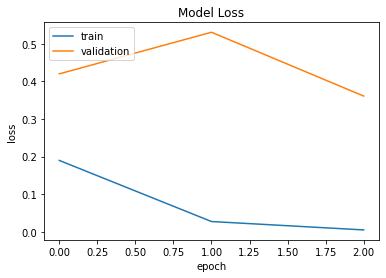

In [ ]:
learner.plot('loss')

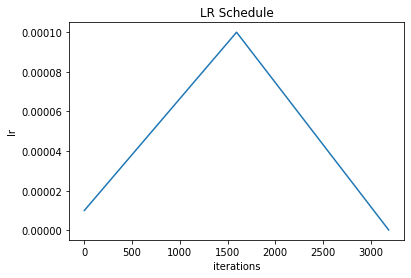

In [ ]:
learner.plot('lr')

In [ ]:
learner.validate()

165/165 [==============================] - 14s 74ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       918
           1       0.93      0.94      0.93      2953
           2       0.95      0.90      0.92      1383

    accuracy                           0.92      5254
   macro avg       0.91      0.91      0.91      5254
weighted avg       0.92      0.92      0.92      5254



array([[ 819,   73,   26],
       [ 142, 2765,   46],
       [   5,  134, 1244]])